In [ ]:
!conda install scikit-learn

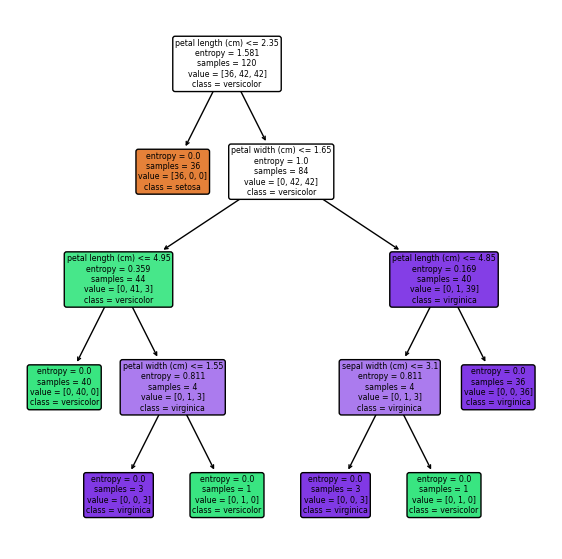

In [41]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
# train_test_split : 전체 데이터의 일부를 테스트 용으로 분리한다. 모델 학습 후 분리된 테스트 데이터를 사용한다.

iris = load_iris()
# data, targets = iris.data, iris.target # (150, 4) (150,) # type: ignore

# train_test_split(data, targets, test_size=(비율), random_state=random_seed)
X_train, X_test, y_train, y_test = \
    train_test_split(iris.data, iris.target, test_size=0.2, random_state=2) # type: ignore

# print(f'{type(X_train) = } / {X_train.shape}')
# print(f'{type(X_test)  = } / {X_test.shape}')
# print(f'{type(y_train) = } / {y_train.shape}')
# print(f'{type(y_test)  = } / {y_test.shape}')

# model
model = DecisionTreeClassifier(criterion='entropy') # default : gini
model.fit(X_train, y_train) # 학습
accuracy = model.score(X_test, y_test)
# print(f'accuracy : {accuracy:.4f}')

# print(model.get_depth())
# print(model.get_n_leaves())
# print(model.get_params())
# print(model.predict)


plt.figure(figsize=(7, 7))
tree.plot_tree(model,
              class_names=iris.target_names,
              feature_names=iris.feature_names,
              impurity=True, filled=True,
              rounded=True)
plt.show()


In [21]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# R**2(결정계수) = 1 - sum((타겟-예측)**2)/sum((타겟-타겟평균)**2)
# R**2(결정계수) = 1 - sum(y_test - model.predict(X_data))**2/sum(y_test - np.mean(y_test))**2
# 결정계수가 음수로 나올 수 있다. 왜 그럴까?

diabetes = load_diabetes()
# data
# target
# feature_names

X_train, X_test, y_train, y_test = \
    train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=1) # type: ignore

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
R = model.score(X_test, y_test) # 결정지수
print(f'R : {R}')
# print(model.predict(X_test))
print(f'R : {1 - np.sum((y_test - model.predict(X_test))**2)/np.sum((y_test - np.mean(y_test))**2)}')


R : -0.3294956164509091
R : -0.3294956164509091


R : 0.9992989843369658
R : 0.9992989843369658


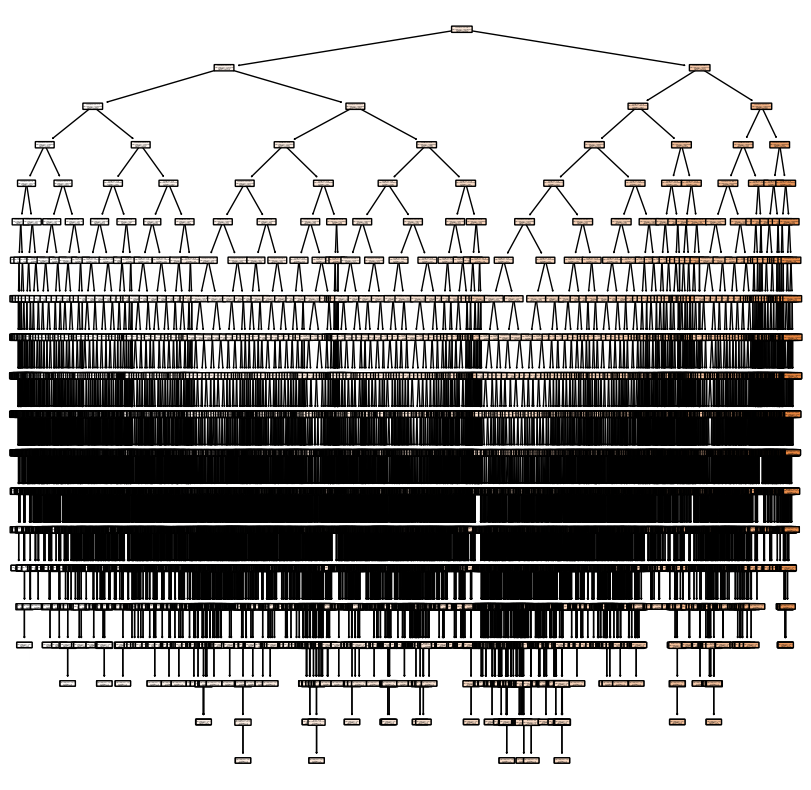

In [25]:
# https://www.kaggle.com/competitions/bike-sharing-demand/overview
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

file = '1016_bike_sharing.csv'
origin = np.loadtxt(file, delimiter=',', dtype=str)

feature_names = origin[0, 2:-1]
target_name = origin[0, -1]
data = np.array(origin[1:, 2:-1], dtype=float)
target = np.array(origin[1:, -1], dtype=float)


X_train, X_test, y_train, y_test = \
    train_test_split(data, target, test_size=0.2, random_state=1) # type: ignore

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
R = model.score(X_test, y_test) # 결정지수
print(f'R : {R}')
print(f'R : {1 - np.sum((y_test - model.predict(X_test))**2)/np.sum((y_test - np.mean(y_test))**2)}')
plt.figure(figsize=(10, 10))
tree.plot_tree(model,
              class_names=target_name,
              feature_names=feature_names,
              impurity=True, filled=True,
              rounded=True)
plt.show()


In [99]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

file = '1016_register_golf_club.csv'
origin = np.loadtxt(file, delimiter=',', dtype=str)

feature_names = origin[0, 1:-1]
target_name = origin[0, -1]
data = np.array(origin[1:, 1:-1])
target = np.array(origin[1:, -1]).reshape(-1, 1)

D = data.shape[0]

def get_P(description, target_class):
    elments = np.unique(description)
    data_P = []
    for el in elments:
        _, cnts = np.unique(target_class[description==el], return_counts=True)
        data_P.append(cnts)
    return data_P

def H(node):
    P_node = np.array(node)
    D_node = P_node.sum()
    P = P_node/D_node
    W = D_node/D
    return -(np.sum(W * P * np.log2(P)))

def get_entropy(description, target_class):
    children_nodes = get_P(description, target_class)
    tmp_h = 0 
    for child_node in children_nodes:
        tmp_h += H(child_node)
    return tmp_h

def get_IG_depth0(description, target_class):
    return H(get_P(target_class, target_class)) - get_entropy(description, target_class)

def convert_column_to_float(colunms):
    elments = np.unique(colunms)
    index = [i for i in range(len(elments))]
    print(index)
    for el, idx in zip(elments, index):
        colunms[colunms==el] = idx
    return colunms

# def convert_data_to_float(datas):
#     n_features = datas.shape[1]
#     for idx in range(n_features):
#         pass

print(data[:,0])
print(convert_column_to_float(data[:,0]))


# print(f'root H : {H(get_P(target, target))}')
# print(f'data[:,0] Entropy : {get_entropy(data[:,0], target)}')
# print(f'data[:,0] IG      : {get_IG_depth0(data[:,0], target)}') # 선택
# print(f'data[:,1] Entropy : {get_entropy(data[:,1], target)}')
# print(f'data[:,1] IG      : {get_IG_depth0(data[:,1], target)}')
# print(f'data[:,2] Entropy : {get_entropy(data[:,2], target)}')
# print(f'data[:,2] IG      : {get_IG_depth0(data[:,2], target)}')
# print(f'data[:,3] Entropy : {get_entropy(data[:,3], target)}')
# print(f'data[:,3] IG      : {get_IG_depth0(data[:,3], target)}')
# X_train, X_test, y_train, y_test = \
#     train_test_split(data, target, test_size=0.2, random_state=1) # type: ignore

# model = DecisionTreeClassifier(criterion='entropy')

['young' 'young' 'middle' 'old' 'old' 'old' 'middle' 'young' 'young' 'old'
 'young' 'middle' 'middle' 'old']
[0, 1, 2]
['2' '2' '0' '1' '1' '1' '0' '2' '2' '1' '2' '0' '0' '1']
